<a href="https://colab.research.google.com/github/santhimaddipudi/ML_Handson/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

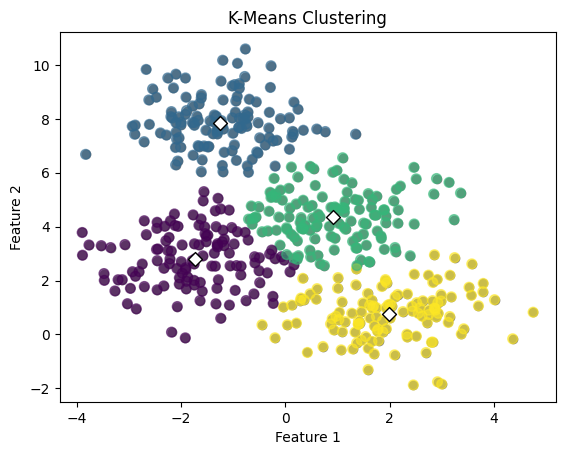

'\nks = [k for k in range(1,15)]\nerrors = []\nfor k in range(1,15):\n    model = Kmeans(k=k)\n    model.fit_predict(X)\n    errors.append(model.clustering_errors(X))\n'

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# helper function for calculating Euclidean distance
def euclidean_distance(a,b):
    d = np.sqrt(np.sum((a - b)**2))
    return d

class Kmeans:

    # construct method for hyperparameter initialization
    def __init__(self, k=3, max_iter=100, tol=1e-06):
        self.k = k
        self.max_iter = max_iter
        self.tol = tol

    # randomly picks the initial centroids from the input data
    def pick_centers(self, X):
        centers_idxs = np.random.choice(self.n_samples, self.k)
        return X[centers_idxs]

    # finds the closest centroid for each data point
    def get_closest_centroid(self, x, centroids):
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        return np.argmin(distances)

    # creates a list with lists containing the idxs of each cluster
    def create_clusters(self, centroids, X):
        clusters = [[] for _ in range(self.k)]
        labels = np.empty(self.n_samples)
        for i, x in enumerate(X):
            centroid_idx = self.get_closest_centroid(x, centroids)
            clusters[centroid_idx].append(i)
            labels[i] = centroid_idx

        return clusters, labels

    # calculates the centroids for each cluster using the mean value
    def compute_centroids(self, clusters, X):
        centroids = np.empty((self.k, self.n_features))
        for i, cluster in enumerate(clusters):
            centroids[i] = np.mean(X[cluster], axis=0)

        return centroids

    # helper function to verify if the centroids changed significantly
    def is_converged(self, old_centroids, new_centroids):
        distances = [euclidean_distance(old_centroids[i], new_centroids[i]) for i in range(self.k)]
        return (sum(distances) < self.tol)


    # method to train the data, find the optimized centroids and label each data point according to its cluster
    def fit_predict(self, X):
        self.n_samples, self.n_features = X.shape
        self.centroids = self.pick_centers(X)

        for i in range(self.max_iter):
            self.clusters, self.labels = self.create_clusters(self.centroids, X)
            new_centroids = self.compute_centroids(self.clusters, X)
            if self.is_converged(self.centroids, new_centroids):
                break
            self.centroids = new_centroids


    # method for evaluating the intracluster variance of the optimization
    def clustering_errors(self, X):
        cluster_values = [X[cluster] for cluster in self.clusters]
        squared_distances = []
        for i, cluster_array in enumerate(cluster_values):
            squared_distances.append(np.sum((cluster_array - self.centroids[i])**2))

        total_error = np.sum(squared_distances)
        return total_error





### Helper Functions for Final Visualization
def plot_clusters(X, labels, centroids, title='K-Means Clustering'):
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=50, c='white', marker='D', edgecolors="black")
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


def scree_plot(ks, errors):
    plt.plot(ks, errors)
    plt.xticks(ks)
    plt.xlabel("K")
    plt.ylabel("Total squared error")
    plt.title("Total Error vs. # of Clusters")
    plt.show()



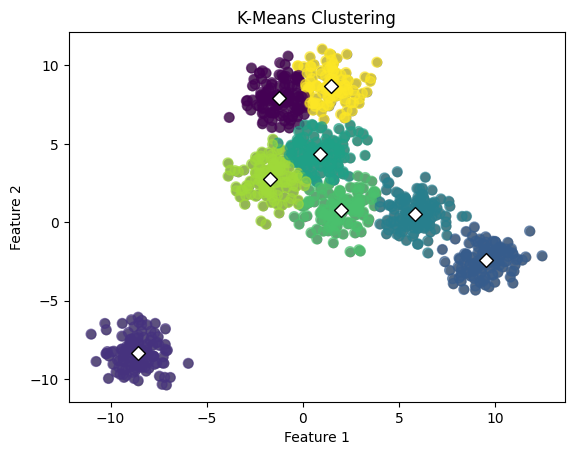

In [10]:
# create simulated data for examples
X, _ = make_blobs(n_samples=1000, n_features=2, centers=8,
                  shuffle=True, random_state=0)


plt.scatter(X[:, 0], X[:, 1], c="gray")
plt.title("Simulated Data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# plt.show()

model = Kmeans(k=8)
model.fit_predict(X)
labels = model.labels
centroids =model.centroids
plot_clusters(X, labels, centroids)





